In [1]:
# data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# The code was removed by Watson Studio for sharing.

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
train.shape

(200000, 202)

In [7]:
train_s = train.drop(["target","ID_code"], axis=1)
train_s = StandardScaler().fit_transform(train_s)
train_s = pd.DataFrame(train_s)

In [8]:
random.seed(1234)

In [9]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 15)
k_means.fit(train_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
train_s["target_x"] = train["target"]
train_s["target_y"] = pd.DataFrame(k_means.labels_)

In [11]:
train_A = train_s.loc[train_s["target_y"] == 0]

In [12]:
train_A.shape

(68529, 202)

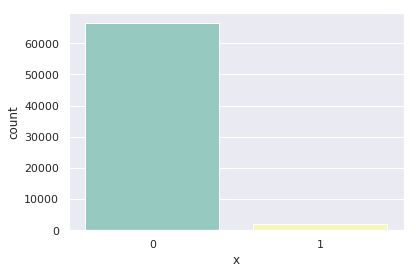

In [13]:
train_yx_0 = pd.DataFrame(train_A["target_y"])
train_yx_0["x"] = train_A["target_x"]
sns.countplot(train_yx_0["x"], palette='Set3')

In [14]:
train_B = train_s.loc[train_s['target_y'] == 1]

In [15]:
train_B.shape

(62951, 202)

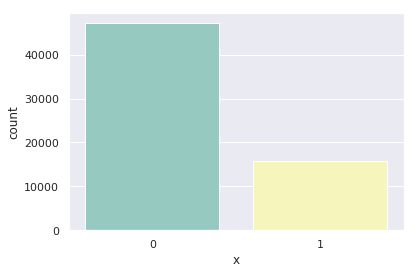

In [16]:
train_yx_1 = pd.DataFrame(train_B["target_y"])
train_yx_1["x"] = train_B["target_x"]
sns.countplot(train_yx_1["x"], palette='Set3')

In [17]:
train_C = train_s.loc[train_s['target_y'] == 2]

In [18]:
train_C.shape

(68520, 202)

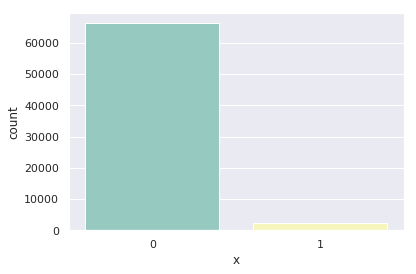

In [19]:
train_yx_2 = pd.DataFrame(train_C["target_y"])
train_yx_2["x"] = train_C["target_x"]
sns.countplot(train_yx_2["x"], palette='Set3')

In [20]:
train_B_s = train_B.drop(["target_y", "target_x"], axis=1)

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(train_B_s, train_B["target_x"] , test_size=0.2, random_state=3)

In [ ]:
C_range = np.logspace(-2, 4, 6)
gamma_range = np.logspace(-5, 1, 6)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_trainset, y_trainset)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
grid.best_params_

In [ ]:
clf = svm.SVC(kernel='rbf', C = 1.0)
clf.fit(X_trainset,y_trainset)

In [ ]:
train_B_s["target_z"] = clf.predict(train_B_s)
train_B_s["target_x"] = train_B["target_x"]

#train_A_s["target_z"] = pd.DataFrame(k_means_A.labels_)

In [ ]:
train_i_0 = train_B_s.loc[train_B_s["target_z"] == 0]

In [ ]:
G_i0 = pd.DataFrame(train_i_0["target_z"])
G_i0["x"] = train_i_0["target_x"]
sns.countplot(G_i0["x"], palette='Set3')

In [ ]:
train_i_1 = train_B_s.loc[train_B_s["target_z"] == 1]

In [ ]:
G_i1 = pd.DataFrame(train_i_1["target_z"])
G_i1["x"] = train_i_1["target_x"]
sns.countplot(G_i1["x"], palette='Set3')

In [ ]:
print("Accuracy: ", metrics.accuracy_score(train_B_s["target_x"], train_B_s["target_z"]))

In [ ]:
print (classification_report(train_B_s["target_x"], train_B_s["target_z"]))

In [ ]:
print(confusion_matrix(train_B_s["target_x"], train_B_s["target_z"], labels=[1,0]))

In [ ]:
body = client_dba5f4fc4d6b434da8a7b73d3a4baca3.get_object(Bucket='kaggle-donotdelete-pr-j9ln9lztc6kv5m',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()

In [ ]:
test_s = test.drop(["ID_code"], axis=1)
test_s = StandardScaler().fit_transform(test_s)
test_s = pd.DataFrame(test_s)

In [ ]:
k_means_t = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 15)
k_means_t.fit(test_s)

In [ ]:
test_s["target_y"] = pd.DataFrame(k_means_t.labels_)

In [ ]:
test_A = test_s.loc[test_s["target_y"] == 0]

In [ ]:
test_A.shape

In [ ]:
test_B = test_s.loc[test_s['target_y'] == 1]

In [ ]:
test_B.shape

In [ ]:
test_C = test_s.loc[test_s['target_y'] == 2]

In [ ]:
test_C.shape

In [ ]:
test_B_s = test_B.drop(["target_y"], axis=1)

In [ ]:
test_B_s["target_z"] = clf.predict(test_B_s)

In [ ]:
test_B_s.shape

In [ ]:
test_B_s.head()

In [ ]:
test_C_s = test_C.drop(["target_y"], axis=1)

In [ ]:
test_C_s["target_z"] = clf.predict(test_C_s)

In [ ]:
test_C_s.shape

In [ ]:
test_C_s.head()

In [ ]:
test_A_s = test_A.drop(["target_y"], axis=1)

In [ ]:
test_A_s["target_z"] = clf.predict(test_A_s)

In [ ]:
test_A_s.shape

In [ ]:
test_A_s.head()

In [ ]:
body = client_dba5f4fc4d6b434da8a7b73d3a4baca3.get_object(Bucket='kaggle-donotdelete-pr-j9ln9lztc6kv5m',Key='sample_submission.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

SS = pd.read_csv(body)
SS.head()

In [ ]:
SS_B = SS.join(test_B_s["target_z"])

In [ ]:
SS_B['y'] = SS_B["target_z"].fillna(0)

In [ ]:
SS_B['y'] = SS_B['y'].astype('int')

In [ ]:
SS_B = SS_B.drop(["target"], axis=1)

In [ ]:
SS_B['target'] = SS_B['y']

In [ ]:
SS_B = SS_B.drop(["y"], axis=1)

In [ ]:
SS_B = SS_B.drop(["target_z"], axis=1)

In [ ]:
SS_B.shape

In [ ]:
SSB_1 = SS_B.loc[SS_B["target"] == 1]

In [ ]:
SSB_1.shape

In [ ]:
SSB_0 = SS_B.loc[SS_B["target"] == 0]

In [ ]:
SSB_0.shape

In [ ]:
SS_C = SS.join(test_C_s["target_z"])

In [ ]:
SS_C['y'] = SS_C["target_z"].fillna(0)

In [ ]:
SS_C['y'] = SS_C['y'].astype('int')

In [ ]:
SS_C = SS_C.drop(["target"], axis=1)

In [ ]:
SS_C['target'] = SS_C['y']

In [ ]:
SS_C = SS_C.drop(["y"], axis=1)

In [ ]:
SS_C = SS_C.drop(["target_z"], axis=1)

In [ ]:
SS_C.shape

In [ ]:
SSC_1 = SS_C.loc[SS_C["target"] == 1]

In [ ]:
SSC_1.shape

In [ ]:
SS_A = SS.join(test_A_s["target_z"])

In [ ]:
SS_A['y'] = SS_A["target_z"].fillna(0)

In [ ]:
SS_A['y'] = SS_A['y'].astype('int')

In [ ]:
SS_A = SS_A.drop(["target"], axis=1)

In [ ]:
SS_A['target'] = SS_A['y']

In [ ]:
SS_A = SS_A.drop(["y"], axis=1)

In [ ]:
SS_A = SS_A.drop(["target_z"], axis=1)

In [ ]:
SS_A.shape

In [ ]:
SSA_1 = SS_A.loc[SS_A["target"] == 1]

In [ ]:
SSA_1.shape

In [ ]:
project.save_data(data=SS_B.to_csv(index=False),file_name='submission_Knn_LR_SVM_2.csv',overwrite=True)